In [177]:
from sklearn.datasets import fetch_california_housing, load_digits
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from IPython.display import display, HTML

First I will run the analysis on the iris dataset...

In [165]:
#load in the data
housing = fetch_california_housing()
X = housing.data
y = housing.target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [171]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [174]:
#find best hyperparameters
reg = SVR(gamma='auto')

kernel_list = ['poly', 'rbf']
degree_list = [2,3,4]

gs = GridSearchCV(reg, cv=3, verbose=3, iid=False, param_grid={
    'kernel': kernel_list,
    'degree': degree_list
    })

gs.fit(x_train, y_train)
print('im done')

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] degree=2, kernel=poly ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. degree=2, kernel=poly, score=-0.435, total=   6.9s
[CV] degree=2, kernel=poly ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] .............. degree=2, kernel=poly, score=-4.953, total=   6.0s
[CV] degree=2, kernel=poly ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.8s remaining:    0.0s


[CV] ............... degree=2, kernel=poly, score=0.184, total=   9.0s
[CV] degree=2, kernel=rbf ............................................
[CV] ................ degree=2, kernel=rbf, score=0.731, total=   4.6s
[CV] degree=2, kernel=rbf ............................................
[CV] ................ degree=2, kernel=rbf, score=0.726, total=   4.7s
[CV] degree=2, kernel=rbf ............................................
[CV] ................ degree=2, kernel=rbf, score=0.739, total=   4.5s
[CV] degree=3, kernel=poly ...........................................
[CV] ............. degree=3, kernel=poly, score=-18.835, total=  48.7s
[CV] degree=3, kernel=poly ...........................................
[CV] ........... degree=3, kernel=poly, score=-7118.154, total=  29.5s
[CV] degree=3, kernel=poly ...........................................
[CV] ............... degree=3, kernel=poly, score=0.370, total= 1.3min
[CV] degree=3, kernel=rbf ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 21.2min finished


im done


In [175]:
print (gs.best_params_)

{'degree': 2, 'kernel': 'rbf'}


In [179]:
data_summary = pd.DataFrame(gs.cv_results_)[['param_kernel','mean_test_score','rank_test_score']]
display(data_summary.sort_values('rank_test_score'))

,param_kernel,mean_test_score,rank_test_score
1,rbf,7.321162e-01,1
3,rbf,7.321162e-01,1
5,rbf,7.321162e-01,1
0,poly,-1.734883e+00,4
2,poly,-2.378873e+03,5
4,poly,-1.446939e+06,6


In [180]:
data_summary = pd.DataFrame(gs.cv_results_)[['mean_fit_time','mean_score_time','mean_test_score','rank_test_score']]
display(data_summary.sort_values('rank_test_score').head(20))

,mean_fit_time,mean_score_time,mean_test_score,rank_test_score
1,3.679539,0.924472,7.321162e-01,1
3,3.646860,0.931347,7.321162e-01,1
5,3.643134,0.926390,7.321162e-01,1
0,6.817021,0.490986,-1.734883e+00,4
2,52.265359,0.477169,-2.378873e+03,5
4,350.035472,0.585162,-1.446939e+06,6


Then I will run it on the mnist dataset...

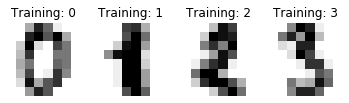

In [181]:
#load in the data
digits = load_digits()

#show ample digits
#taken from: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [182]:
#no need to scale this data
X = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [183]:
clf = SVC(gamma='auto')

kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
C_list = [1, 5, 10, 25, 100]
degree_list = [2,3,4]

gs = GridSearchCV(clf, cv=5, verbose=1, iid=False, param_grid={
    'kernel': kernel_list,
    'C': C_list,
    'degree': degree_list
    })

gs.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   50.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid={'C': [1, 5, 10, 25, 100], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [184]:
print (gs.best_params_)

{'C': 1, 'degree': 3, 'kernel': 'poly'}


In [186]:
data_summary = pd.DataFrame(gs.cv_results_)[['param_kernel','param_C','param_degree','mean_test_score','rank_test_score']]
display(data_summary.sort_values('rank_test_score'))

,param_kernel,param_C,param_degree,mean_test_score,rank_test_score
29,poly,10,3,0.969935,1
41,poly,25,3,0.969935,1
5,poly,1,3,0.969935,1
53,poly,100,3,0.969935,1
17,poly,5,3,0.969935,1
49,poly,100,2,0.965502,6
37,poly,25,2,0.965502,6
25,poly,10,2,0.965502,6
1,poly,1,2,0.965502,6
13,poly,5,2,0.965502,6


In [ ]:
clf = SVC(gamma='auto', kernel='poly')

kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
C_list = [1, 5, 10, 25, 100]

gs = GridSearchCV(clf, cv=5, verbose=1, iid=False, param_grid={
    'kernel': kernel_list,
    'C': C_list
    })

gs.fit(X, y)